In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

Me = 511005.0
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.008
delta = 1.0e-9

g = energy/Me
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

turns = 2048

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

# Prepare beam & lattice

In [3]:
beam = impact.getBeam()
beam.current = 0.0
beam.kinetic_energy = ke
beam.mass = Me
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = 1

In [4]:
beam.distribution.distribution_type = 'Waterbag'
beam.distribution.betx  = betaEntrance
beam.distribution.alfx  = alfaEntrance
beam.distribution.emitx = 0.0
beam.distribution.bety  = betaEntrance
beam.distribution.alfy  = alfaEntrance
beam.distribution.emity = 0.0
beam.distribution.betz  = 0.0
beam.distribution.alfz  = 0.0
beam.distribution.emitz = 0.0
beamOff = copy(beam)

In [5]:
lattice = [impact.getElem('loop_through_lattice'),impact.getElem('nonlinear_insert'),impact.getElem('linear_matrix_map')] 
lattice[0].turns=turns
lattice[1].length = NL_L
lattice[1].strength_t = NL_t
lattice[1].transverse_scale_c = NL_c
lattice[1].tune_advance = NL_mu
lattice[1].n_sckick = 100
lattice[2].nonlinear_insert_length = NL_L
lattice[2].nonlinear_insert_tuneAdvance = NL_mu

# run

In [6]:
nSample = 5
X=[]
Y=[]
for d in np.linspace(-delta,+delta,nSample):
    print(d)
    beamOff = copy(beam)
    beamOff.distribution.offsetx = offset+d
    impact.writeInputFile(beamOff,lattice)
    impact.run(beam)
    fort82=np.loadtxt('fort.82')
    X.append(fort82[:,1] + 1j*fort82[:,2])
    Y.append(fort82[:,3] + 1j*fort82[:,4])

-1e-09
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
-5e-10
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
0.0
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
5.000000000000001e-10
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
1e-09
input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


In [7]:
Tune=[0]*nSample
Amp =[0]*nSample
Y1  =[0]*nSample
emitlist = [0]*nSample
for i in range(nSample):
    Tune[i],Amp[i],Y1[i] = impact.util.naff(1,X[i])
    print('initial kick X,Y   = ',X[i][0],Y[i][0])
    print('initial kick angle = ',np.angle(X[i][0]))
    emitlist[i] = np.abs(X[i][0])**2/2.0

initial kick X,Y   =  (0.41832120579678317-0.999830052907663j) (-5.788944462972502e-19+8.60344267269909e-19j)
initial kick angle =  -1.1745357374787497
initial kick X,Y   =  (0.4183211695928999-0.9998301744650558j) (-1.5009684235189599e-18-4.006966671784094e-18j)
initial kick angle =  -1.1745358115838473
initial kick X,Y   =  (0.41832113338899907-0.9998302960224514j) (4.726411099655002e-18+9.983963451055028e-18j)
initial kick angle =  -1.1745358856889474
initial kick X,Y   =  (0.418321097185083-0.9998304175798493j) (7.718142610520569e-19+2.493584365967019e-18j)
initial kick angle =  -1.1745359597940477
initial kick X,Y   =  (0.4183210609811497-0.9998305391372535j) (3.1600934023153607e-19+2.367776325339185e-18j)
initial kick angle =  -1.1745360338991515


[-1182.20838921]


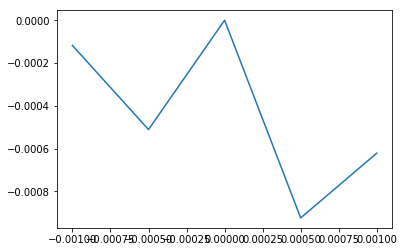

In [8]:
plt.plot(np.linspace(-delta,delta,nSample)*1.0e6,Tune-Tune[int(nSample/2)])
print((Tune[-1]-Tune[0])/(emitlist[-1]-emitlist[0]))

In [9]:
pData=impact.readParticleData(-111110,ke,Me,freq)
print(pData)

[[ 8.00000100e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.95692801e-06 -0.00000000e+00
   1.00000000e+00]]


In [10]:
print(Tune)

[array([0.58139296]), array([0.58100003]), array([0.58151069]), array([0.58058719]), array([0.58088985])]
